<a href="https://colab.research.google.com/github/MarioSigal/Procesamiento-de-Imagenes/blob/main/Trabajo_Final_Contador_Formas_Pdi2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Nombre de Grupos*:

*Integrantes*:

# **Trabajo Final: Contador de Formas**


## **Set Up**

In [1]:
# Ejecuta esta celda una sola vez para instalar las librerías necesarias
!pip install matplotlib seaborn scikit-learn

## **Subir DataSet**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Por Zip

In [3]:
from google.colab import files

# Subir el archivo ZIP que contiene shape_dataset
uploaded = files.upload()

# Descomprimir el zip en una carpeta
!unzip shape_dataset.zip -d shape_dataset


Saving shape_dataset.zip to shape_dataset.zip
Archive:  shape_dataset.zip
   creating: shape_dataset/shape_dataset/
  inflating: shape_dataset/shape_dataset/image_0000.png  
  inflating: shape_dataset/shape_dataset/image_0001.png  
  inflating: shape_dataset/shape_dataset/image_0002.png  
  inflating: shape_dataset/shape_dataset/image_0003.png  
  inflating: shape_dataset/shape_dataset/image_0004.png  
  inflating: shape_dataset/shape_dataset/image_0005.png  
  inflating: shape_dataset/shape_dataset/image_0006.png  
  inflating: shape_dataset/shape_dataset/image_0007.png  
  inflating: shape_dataset/shape_dataset/image_0008.png  
  inflating: shape_dataset/shape_dataset/image_0009.png  
  inflating: shape_dataset/shape_dataset/image_0010.png  
  inflating: shape_dataset/shape_dataset/image_0011.png  
  inflating: shape_dataset/shape_dataset/image_0012.png  
  inflating: shape_dataset/shape_dataset/image_0013.png  
  inflating: shape_dataset/shape_dataset/image_0014.png  
  inflating: s

### Por Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Cambia esta ruta si tu dataset está en otro lugar de tu Drive
dataset_path = '/content/drive/MyDrive/shape_dataset'

## **ShapeCounter, ShapeCounterEvaluator y Auxiliares**

In [5]:
import numpy as np
from skimage import io, color
import json
import os
from typing import Dict, Tuple, List
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time
import datetime
import seaborn as sns
import cv2

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detectar_circulos(img):
    # Detectar círculos
    circles = cv2.HoughCircles(
        img,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=100,
        param2=30,
        minRadius=0,
        maxRadius=100
    )

    # Dibujar los círculos si hay
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # círculo
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # centro
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

        print(f"Se detectaron {len(circles[0])} círculos")
    else:
        print("No se detectaron círculos")

    # Convertir BGR (OpenCV) → RGB (matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostrar con matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Círculos detectados")
    plt.show()

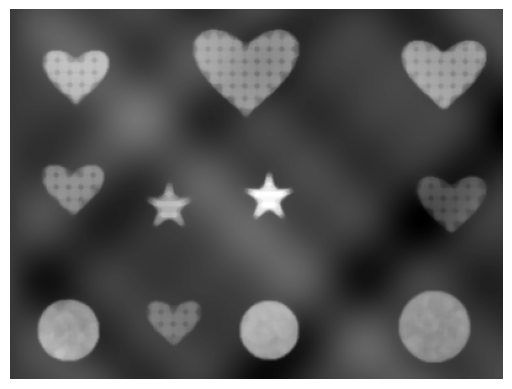

Se detectaron 3 círculos


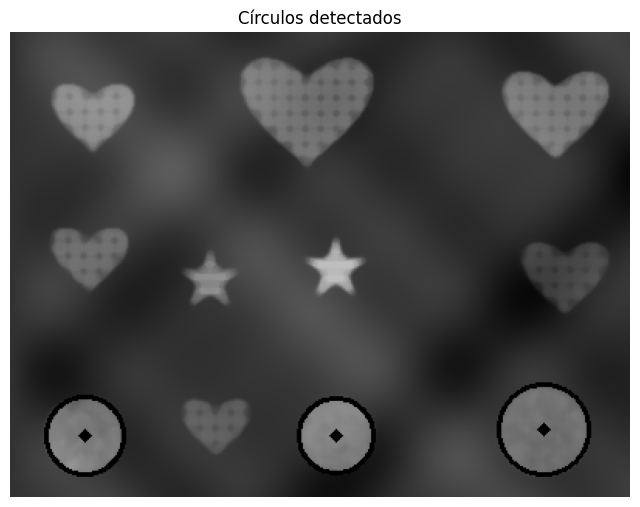

In [59]:
gray = cv2.imread("shape_dataset/shape_dataset/image_0015.png")
#plt.imshow(image, cmap='gray')
#plt.axis('off')
#plt.show()

gray = cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)

gray = cv2.GaussianBlur(gray, (5, 5), 1)
gray = cv2.medianBlur(gray, 7)


plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()
detectar_circulos(gray)

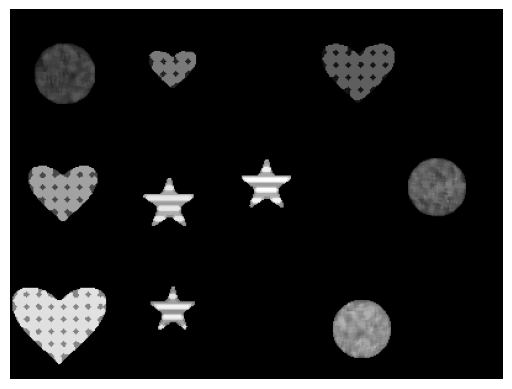

In [60]:
image = cv2.imread("shape_dataset/shape_dataset/image_0193.png")
#plt.imshow(image, cmap='gray')
#plt.axis('off')
#plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

denoised = cv2.medianBlur(gray, 5) #saca sal y pimienta


plt.imshow(denoised, cmap='gray')
plt.axis('off')
plt.show()



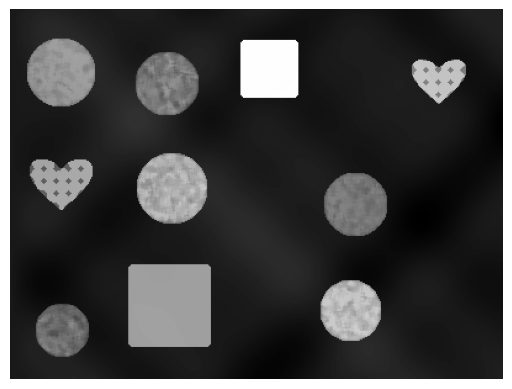

In [42]:
image = cv2.imread("shape_dataset/shape_dataset/image_0194.png")
#plt.imshow(image, cmap='gray')
#plt.axis('off')
#plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

denoised = cv2.medianBlur(gray, 5) #saca sal y pimienta


plt.imshow(denoised, cmap='gray')
plt.axis('off')
plt.show()

In [43]:
import cv2
import numpy as np
image = cv2.imread("shape_dataset/shape_dataset/image_0000.png")
# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Aplicar suavizado para reducir ruido
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Umbral adaptativo para separar formas del fondo
binary = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    blockSize=11,
    C=2
)

image =
plt.imshow(image, cmap='gray')  # `cmap='gray'` si es escala de grises
plt.axis('off')  # Oculta los ejes
plt.show()

SyntaxError: invalid syntax (ipython-input-2465553461.py, line 20)

In [ ]:
class ShapeCounter():
    def __init__(self):
      pass

    def count(self, image: np.ndarray) -> Dict[str, int]:
        """
        ==========================================
        IMPLEMENTACIÓN REQUERIDA
        ==========================================

        Dada una imagen de entrada, contar el número de cada tipo de forma.

        Args:
            image: Imagen de entrada como array numpy

        Returns:
            Diccionario con los conteos para cada tipo de forma:
            {
                'circle': int,
                'square': int,
                'star': int,
                'heart': int
            }

        """

        return {
            'circle': 0,
            'square': 0,
            'star': 0,
            'heart': 0
        }


In [ ]:
class ShapeCounterEvaluator:
    """
    Marco de evaluación para el Proyecto Final de Conteo de Formas
    Clase de Procesamiento de Imágenes

    Implementar la función shape_counter() más abajo.
    """

    def __init__(self, dataset_path: str = "shape_dataset", shape_counter: ShapeCounter = ShapeCounter()):
        """
        Inicializa el evaluador con la ruta del dataset

        Args:
            dataset_path: Ruta a la carpeta del dataset generado
        """
        self.shape_counter = shape_counter
        self.dataset_path = dataset_path
        self.annotations_file = os.path.join(dataset_path, "annotations.json")
        # Cargar anotaciones de ground truth
        try:
            with open(self.annotations_file, 'r') as f:
                self.annotations = json.load(f)
            print(f"Cargadas {len(self.annotations)} imágenes para evaluación")
        except FileNotFoundError:
            print(f"ERROR: No se encontró el archivo {self.annotations_file}")
            print("Asegúrate de que el dataset esté generado y en la ruta correcta")
            self.annotations = []

        # Configuración de formas
        self.shape_info = {
            'circle': {'color_hue': 120, 'description': 'Círculos azules con textura rocosa'},
            'square': {'color_hue': 60, 'description': 'Cuadrados verdes con textura lisa'},
            'star': {'color_hue': 25, 'description': 'Estrellas amarillas con textura ondulada'},
            'heart': {'color_hue': 0, 'description': 'Corazones rojos con textura punteada'}
        }

    def display_sample_images(self, num_samples: int = 4):
        if len(self.annotations) == 0:
            print("No hay imágenes disponibles para mostrar")
            return

        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.ravel()

        for i in range(min(num_samples, len(self.annotations))):
            annotation = self.annotations[i]
            image_path = os.path.join(self.dataset_path, annotation['filename'])

            try:
                image = io.imread(image_path)
                axes[i].imshow(image)
                axes[i].set_title(f"{annotation['filename']}\n"
                                  f"Círculos: {annotation['shapes']['circle']}, "
                                  f"Cuadrados: {annotation['shapes']['square']}\n"
                                  f"Estrellas: {annotation['shapes']['star']}, "
                                  f"Corazones: {annotation['shapes']['heart']}\n"
                                  f"Efecto: {annotation['effect_applied']}")
                axes[i].axis('off')
            except Exception as e:
                axes[i].text(0.5, 0.5, f"Error cargando imagen:\n{str(e)}",
                             ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')

        plt.tight_layout()
        plt.savefig('imagenes_ejemplo.png', dpi=150, bbox_inches='tight')
        plt.show()

    def evaluate_single_image(self, image_path: str, ground_truth: Dict[str, int]) -> Dict:
        """Evalúa el contador de formas en una sola imagen"""
        image = io.imread(image_path)
        if image is None:
            raise ValueError(f"No se pudo cargar la imagen: {image_path}")

        # Obtener predicción
        prediction = self.shape_counter.count(image)

        # Calcular errores
        errors = {}
        total_error = 0
        total_shapes_gt = sum(ground_truth.values())
        total_shapes_pred = sum(prediction.values())

        for shape in self.shape_info.keys():
            gt_count = ground_truth[shape]
            pred_count = prediction[shape]
            error = abs(gt_count - pred_count)
            errors[shape] = error
            total_error += error

        return {
            'prediction': prediction,
            'ground_truth': ground_truth,
            'errors': errors,
            'total_error': total_error,
            'total_shapes_gt': total_shapes_gt,
            'total_shapes_pred': total_shapes_pred
        }

    def evaluate_dataset(self, max_images: int = None) -> Dict:
        """
        Evalúa el contador de formas en todo el dataset

        Args:
            max_images: Número máximo de imágenes a evaluar (None para todas)

        Returns:
            Diccionario conteniendo resultados de evaluación y estadísticas
        """
        if len(self.annotations) == 0:
            print("ERROR: No hay anotaciones disponibles para evaluar")
            return {'error': 'No annotations available'}

        results = []
        total_errors = {shape: 0 for shape in self.shape_info.keys()}
        total_shapes = {shape: 0 for shape in self.shape_info.keys()}

        images_to_process = self.annotations[:max_images] if max_images else self.annotations

        print(f"Evaluando en {len(images_to_process)} imágenes...")

        start_time = time.time()
        for i, annotation in enumerate(images_to_process):
            image_path = os.path.join(self.dataset_path, annotation['filename'])
            ground_truth = annotation['shapes']

            try:
                result = self.evaluate_single_image(image_path, ground_truth)
                results.append(result)

                # Acumular estadísticas
                for shape in self.shape_info.keys():
                    total_errors[shape] += result['errors'][shape]
                    total_shapes[shape] += ground_truth[shape]

                if (i + 1) % 10 == 0:
                    print(f"Procesadas {i + 1}/{len(images_to_process)} imágenes")

            except Exception as e:
                print(f"Error procesando {annotation['filename']}: {e}")
                continue

        if len(results) == 0:
            print("ERROR: No se procesó ninguna imagen exitosamente")
            return {'error': 'No images processed successfully'}

        # Calcular estadísticas finales

        end_time = time.time()
        total_time_sec = end_time - start_time

        num_images = len(results)
        mean_absolute_errors = {shape: total_errors[shape] / num_images
                               for shape in self.shape_info.keys()}

        overall_mae = sum(mean_absolute_errors.values())

        # Calcular métricas de precisión
        accuracy_per_shape = {}
        for shape in self.shape_info.keys():
            if total_shapes[shape] > 0:
                accuracy_per_shape[shape] = max(0, 1 - (total_errors[shape] / total_shapes[shape]))
            else:
                accuracy_per_shape[shape] = 1.0

        evaluation_results = {
            'num_images_processed': num_images,
            'mean_absolute_errors': mean_absolute_errors,
            'overall_mae': overall_mae,
            'accuracy_per_shape': accuracy_per_shape,
            'total_errors': total_errors,
            'total_shapes': total_shapes,
            'processing_time_seconds': total_time_sec,
            'detailed_results': results
        }

        return evaluation_results

    def print_evaluation_summary(self, results: Dict):
        """Imprime un resumen formateado de los resultados de evaluación"""
        if 'error' in results:
            print(f"Error en evaluación: {results['error']}")
            return

        print("\n" + "="*60)
        print("RESULTADOS DE EVALUACIÓN DEL CONTADOR DE FORMAS")
        print("="*60)

        print(f"Imágenes procesadas: {results['num_images_processed']}")
        print(f"Error Absoluto Medio General: {results['overall_mae']:.2f}")

        formatted_time = str(datetime.timedelta(seconds=int(results['processing_time_seconds'])))
        print(f"Tiempo total de procesamiento: {formatted_time}")


        print("\nResultados por forma:")
        print("-"*50)
        for shape in self.shape_info.keys():
            mae = results['mean_absolute_errors'][shape]
            accuracy = results['accuracy_per_shape'][shape] * 100
            total_gt = results['total_shapes'][shape]
            total_errors = results['total_errors'][shape]

            shape_names = {
                'circle': 'Círculos',
                'square': 'Cuadrados',
                'star': 'Estrellas',
                'heart': 'Corazones'
            }

            print(f"{shape_names[shape]:10s}: EAM={mae:5.2f}, Precisión={accuracy:5.1f}%, "
                  f"Total GT={total_gt:3d}, Total Errores={total_errors:3d}")

        print(f"\nPrecisión general: {(sum(results['accuracy_per_shape'].values()) / 4 * 100):.1f}%")

    def plot_results(self, results: Dict):
        """Crear visualizaciones de los resultados de evaluación"""
        if 'error' in results:
            print(f"No se pueden graficar resultados debido a: {results['error']}")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

        # Nombres en español para las formas
        shape_names = ['Círculos', 'Cuadrados', 'Estrellas', 'Corazones']
        shape_keys = ['circle', 'square', 'star', 'heart']

        # 1. Error Absoluto Medio por forma
        maes = [results['mean_absolute_errors'][shape] for shape in shape_keys]

        bars1 = ax1.bar(shape_names, maes, color=['blue', 'green', 'gold', 'red'], alpha=0.7)
        ax1.set_title('Error Absoluto Medio por Tipo de Forma')
        ax1.set_ylabel('Error Absoluto Medio')
        ax1.set_ylim(0, max(maes) * 1.1 if maes else 1)
        ax1.tick_params(axis='x', rotation=45)

        # Agregar etiquetas de valor en las barras
        for bar, mae in zip(bars1, maes):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{mae:.2f}', ha='center', va='bottom')

        # 2. Precisión por forma
        accuracies = [results['accuracy_per_shape'][shape] * 100 for shape in shape_keys]
        bars2 = ax2.bar(shape_names, accuracies, color=['blue', 'green', 'gold', 'red'], alpha=0.7)
        ax2.set_title('Precisión por Tipo de Forma')
        ax2.set_ylabel('Precisión (%)')
        ax2.set_ylim(0, 105)
        ax2.tick_params(axis='x', rotation=45)

        for bar, acc in zip(bars2, accuracies):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{acc:.1f}%', ha='center', va='bottom')


        plt.tight_layout()
        plt.savefig('resultados_evaluacion.png', dpi=150, bbox_inches='tight')
        plt.show()

    def run_evaluation(self, max_images: int = None, show_plots: bool = True):
        """
        Pipeline completo de evaluación

        Args:
            max_images: Número máximo de imágenes a evaluar (None para todas)
            show_plots: Si mostrar gráficos de resultados
        """
        print("Iniciando Evaluación del Contador de Formas...")
        print("\nInformación del Dataset:")
        print(f"Imágenes totales disponibles: {len(self.annotations)}")

        if len(self.annotations) == 0:
            print("ERROR: No se encontraron imágenes para evaluar")
            print("Verifica que el dataset esté correctamente cargado")
            return None

        # Mostrar imágenes de muestra
        print("\nMostrando imágenes de ejemplo...")
        self.display_sample_images()

        # Ejecutar evaluación
        results = self.evaluate_dataset(max_images)

        # Mostrar resultados
        self.print_evaluation_summary(results)

        if show_plots and 'error' not in results:
            self.plot_results(results)

        return results



NameError: name 'ShapeCounter' is not defined

In [ ]:
# =============================================================================
# FUNCIONES AUXILIARES ADICIONALES
# =============================================================================

def cargar_y_mostrar_imagen(image_path: str):
    image = io.imread(image_path)
    if image is None:
        print(f"Error: No se pudo cargar la imagen {image_path}")
        return None

    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.title(f"Imagen: {os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()

    return image

def mostrar_info_formas():
    """Muestra información sobre las características de cada forma"""
    print("INFORMACIÓN DE FORMAS PARA EL PROYECTO")
    print("="*50)
    print("Círculos:")
    print("  - Color: Azul (Matiz HSV ~120°)")
    print("  - Textura: Rocosa")
    print()
    print("Cuadrados:")
    print("  - Color: Verde (Matiz HSV ~60°)")
    print("  - Textura: Lisa")
    print()
    print("Estrellas:")
    print("  - Color: Amarillo (Matiz HSV ~25°)")
    print("  - Textura: Ondulada")
    print()
    print("Corazones:")
    print("  - Color: Rojo (Matiz HSV ~0°)")
    print("  - Textura: Punteada")
    print()
    print("EFECTOS APLICADOS:")
    print("- Ruido sal y pimienta")
    print("- Ruido gaussiano")
    print("- Efecto de niebla")
    print("- Sin efecto")

## **Sus Shapes Counters**

Implemetar aqui sus algoritmo/s

In [ ]:

class BasicShapeCounter(ShapeCounter):

    def count(self, image: np.ndarray) -> Dict[str, int]:
        return {
            'circle': 0,
            'square': 0,
            'star': 0,
            'heart': 0
        }


## **Evaluacion**

In [ ]:
mostrar_info_formas()

INFORMACIÓN DE FORMAS PARA EL PROYECTO
Círculos:
  - Color: Azul (Matiz HSV ~120°)
  - Textura: Rocosa

Cuadrados:
  - Color: Verde (Matiz HSV ~60°)
  - Textura: Lisa

Estrellas:
  - Color: Amarillo (Matiz HSV ~25°)
  - Textura: Ondulada

Corazones:
  - Color: Rojo (Matiz HSV ~0°)
  - Textura: Punteada

EFECTOS APLICADOS:
- Ruido sal y pimienta
- Ruido gaussiano
- Efecto de niebla
- Sin efecto


Trabajo Final Contador de Formas - Procesamiento de Imágenes
Cargadas 200 imágenes para evaluación

Ejecutando evaluación en las primeras 20 imágenes para pruebas rápidas...
Iniciando Evaluación del Contador de Formas...

Información del Dataset:
Imágenes totales disponibles: 200

Mostrando imágenes de ejemplo...


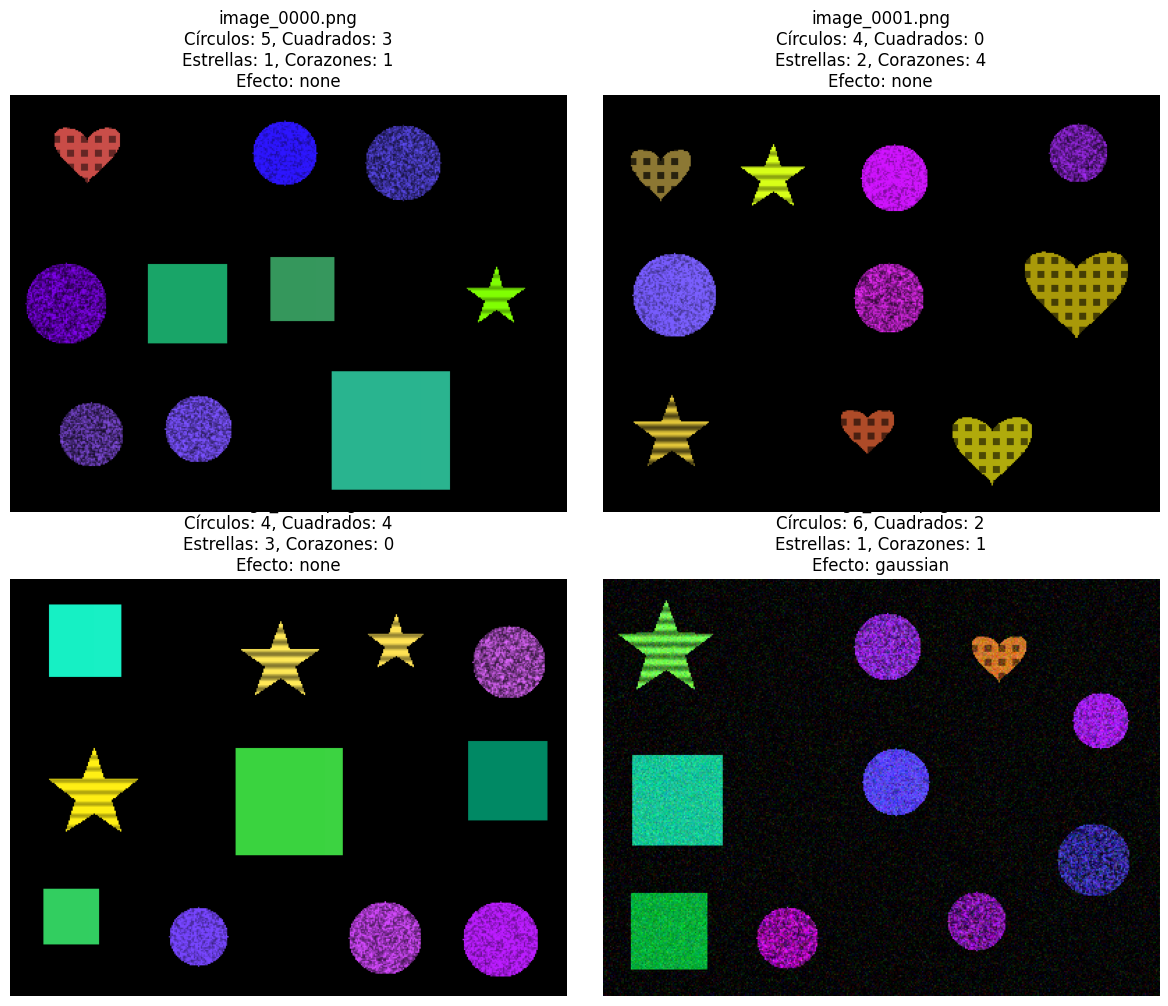

Evaluando en 20 imágenes...
Procesadas 10/20 imágenes
Procesadas 20/20 imágenes

RESULTADOS DE EVALUACIÓN DEL CONTADOR DE FORMAS
Imágenes procesadas: 20
Error Absoluto Medio General: 10.30
Tiempo total de procesamiento: 0:00:00

Resultados por forma:
--------------------------------------------------
Círculos  : EAM= 3.65, Precisión=  0.0%, Total GT= 73, Total Errores= 73
Cuadrados : EAM= 1.80, Precisión=  0.0%, Total GT= 36, Total Errores= 36
Estrellas : EAM= 2.45, Precisión=  0.0%, Total GT= 49, Total Errores= 49
Corazones : EAM= 2.40, Precisión=  0.0%, Total GT= 48, Total Errores= 48

Precisión general: 0.0%


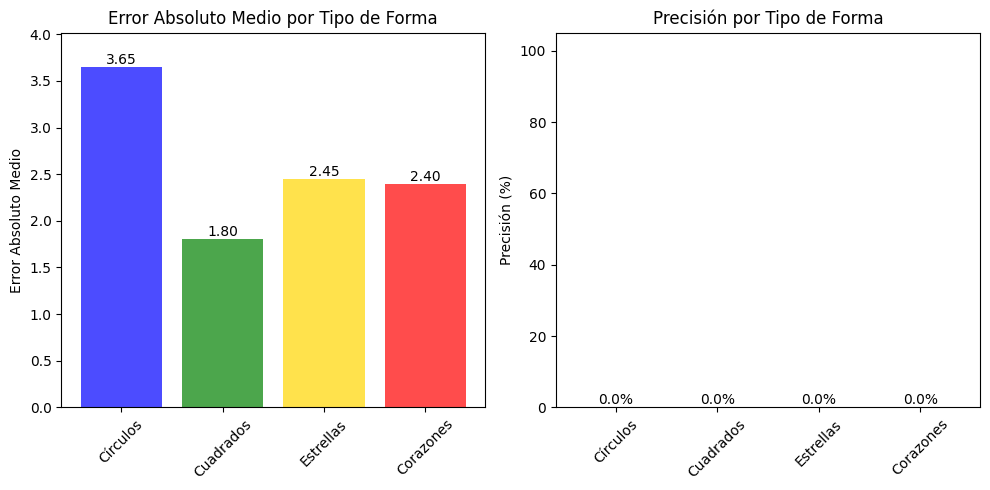


¡Evaluación completa!


In [ ]:

print("Trabajo Final Contador de Formas - Procesamiento de Imágenes")
print("="*70)

dataset_path = "shape_dataset/shape_dataset"

# Definen el ShapeCounter a Evaluar
shape_counter_candidate = BasicShapeCounter()

# Instancia del evaluador
evaluator = ShapeCounterEvaluator(dataset_path, shape_counter_candidate)

if len(evaluator.annotations) == 0:
    print("\n¡IMPORTANTE!")
    print("No se encontró el dataset. Para usar este código:")
    print("1. Ejecuta primero el generador de dataset")
    print("2. O sube el dataset generado a Colab")
    print("3. Asegúrate de que la carpeta 'shape_dataset' esté disponible")

else:

  # Evaluar las primeras 20 imágenes para pruebas
  print("\nEjecutando evaluación en las primeras 20 imágenes para pruebas rápidas...")

  results = evaluator.run_evaluation(max_images=20)
  #results = evaluator.run_evaluation()

  print("\n¡Evaluación completa!")



In [ ]:
  # Mostrar resumen de evaluación
  evaluator.print_evaluation_summary(results)


RESULTADOS DE EVALUACIÓN DEL CONTADOR DE FORMAS
Imágenes procesadas: 20
Error Absoluto Medio General: 10.30
Tiempo total de procesamiento: 0:00:00

Resultados por forma:
--------------------------------------------------
Círculos  : EAM= 3.65, Precisión=  0.0%, Total GT= 73, Total Errores= 73
Cuadrados : EAM= 1.80, Precisión=  0.0%, Total GT= 36, Total Errores= 36
Estrellas : EAM= 2.45, Precisión=  0.0%, Total GT= 49, Total Errores= 49
Corazones : EAM= 2.40, Precisión=  0.0%, Total GT= 48, Total Errores= 48

Precisión general: 0.0%


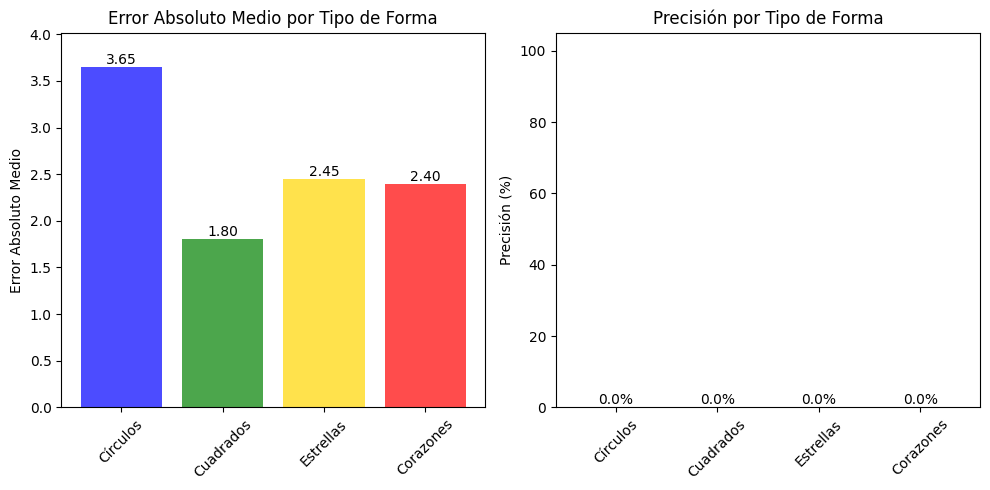

In [ ]:
# Mostrar los Plots
evaluator.plot_results(results)